In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


Importing original data from csv files.

In [2]:
incidents = pd.read_csv("Louisville_Metro_KY_-_Fire_Incidents.csv")

prop_damage = pd.read_csv("Louisville_Metro_KY_-_Fire_Property_Damage.csv")

In [3]:
prop_damage.head()

,inci_no,Alm_Date,Address,Inci_type,Content_Loss,Property_Loss,Total_Loss,Pre_Inci_Value,Saved,ObjectId
0,17-0000034,2017/01/01 05:00:00+00,1551 W ORMSBY Louisville KY 40210,"100 - Fire, other",100.0,0.0,100,67320,67220,1
1,17-0000088,2017/01/01 05:00:00+00,1442 W SOUTHERN HEIGHTS Louisville KY 40215,"441 - Heat from short circuit (wiring), defect...",100.0,NaN,100,65000,64900,2
2,17-0000222,2017/01/02 05:00:00+00,3012 S 5th Louisville KY 40208,111 - Building fire,8000.0,56040.0,64040,56040,-8000,3
3,17-0000192,2017/01/02 05:00:00+00,3320 Bank Louisville KY 40212,131 - Passenger vehicle fire,NaN,4500.0,4500,5000,500,4
4,17-0000222,2017/01/02 05:00:00+00,3012 S 5th Louisville KY 40208,111 - Building fire,0.0,61000.0,61000,61000,0,5


Joining the original data to form the working dataframe.

In [4]:
merged_df = incidents.merge(prop_damage[['inci_no', 'Total_Loss', 'Saved']],
                            how='inner',
                            left_on='Inci_No',
                            right_on='inci_no')[['Inci_No', 'Station', 'Total_Loss', 'Saved']]

merged_df.drop_duplicates(subset=['Inci_No'], keep='first', inplace=True, ignore_index=True)
merged_df.head()

,Inci_No,Station,Total_Loss,Saved
0,17-0000034,Station 16,100,67220
1,17-0000088,Station 10,100,64900
2,17-0000222,Station 18,64040,-8000
3,17-0000192,Station 6,4500,500
4,17-0000455,Station 12,25000,365000


Cleaning the merged dataframe

In [5]:
merged_df['Saved'] = merged_df['Saved'].astype(str)

merged_df.loc[merged_df['Saved'].str.startswith('-'), 'Saved'] = '0'

merged_df['Saved'] = pd.to_numeric(merged_df['Saved'])

merged_df.head()

,Inci_No,Station,Total_Loss,Saved
0,17-0000034,Station 16,100,67220
1,17-0000088,Station 10,100,64900
2,17-0000222,Station 18,64040,0
3,17-0000192,Station 6,4500,500
4,17-0000455,Station 12,25000,365000


Create selectable view by input in case a narrower view is preferred or needed of each station.

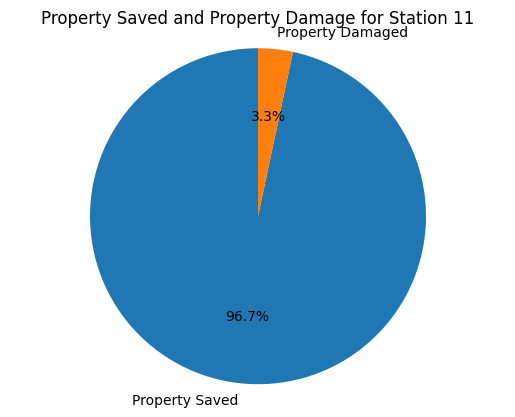

In [36]:
station_number = input("Enter the Station number 1 - 23: ")

station_key = "Station " + station_number

filtered_df = merged_df[merged_df['Station'] == station_key]

total_property_saved = filtered_df['Saved'].sum()
total_loss = filtered_df['Total_Loss'].sum()

labels = ['Property Saved', 'Property Damaged']
sizes = [total_property_saved, total_loss]
colors = ['#1f77b4', '#ff7f0e']

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title(f"Property Saved and Property Damage for Station {station_number}")
plt.show()

Create comparative bar chart based on ratio of damage/saved.

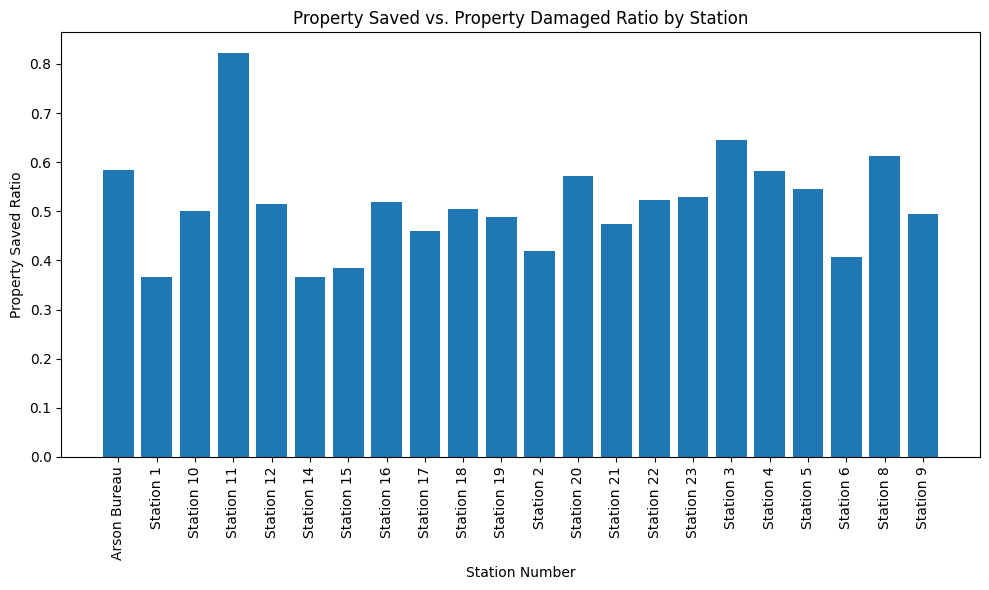

In [32]:

merged_df['property_saved_ratio'] = merged_df['Saved'] / (merged_df['Saved'] + merged_df['Total_Loss'])

grouped_df = merged_df.groupby('Station')['property_saved_ratio'].mean().reset_index()



plt.figure(figsize=(10, 6))
plt.bar(grouped_df['Station'], grouped_df['property_saved_ratio'], color='#1f77b4')

plt.xlabel('Station Number')
plt.ylabel('Property Saved Ratio')
plt.title('Property Saved vs. Property Damaged Ratio by Station')

plt.xticks(rotation=90)
plt.tight_layout()

plt.show()

Consider avg value of property per incident. To do this the Data will be reformatted into another dataframe with all original columns and rows. The average value of incidents responded to is an import factor when considering the overall efficiency of FD salvage.

In [12]:
df = pd.merge(incidents, prop_damage, left_on='Inci_No', right_on='inci_no', how='outer')

df.head()

,Inci_No,Inci_Date,Exp_No,Address_x,Zip,Census,Category,Inci_Type,FPU_Category,FPU,...,inci_no,Alm_Date,Address_y,Inci_type,Content_Loss,Property_Loss,Total_Loss,Pre_Inci_Value,Saved,ObjectId_y
0,17-0000001,2017/01/01 05:00:00+00,0,731 S 38TH ST,40211,11.0,6 - Good Intent Call,"661 - EMS call, party transported by non-fire ...",4 - Residential,419 - 1 or 2 family dwelling,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,17-0000002,2017/01/01 05:00:00+00,0,LENTZ Avenue,40215,44.0,4 - Hazardous Condition (No Fire),444 - Power line down,4 - Residential,419 - 1 or 2 family dwelling,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,17-0000003,2017/01/01 05:00:00+00,0,1125 S 8TH ST,40203,51.0,3 - Rescue & Emergency Medical Service Incident,"311 - Medical assist, assist EMS crew",4 - Residential,429 - Multifamily dwelling,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,17-0000004,2017/01/01 05:00:00+00,0,1119 BEECHER ST,40215,38.0,3 - Rescue & Emergency Medical Service Incident,"311 - Medical assist, assist EMS crew",4 - Residential,419 - 1 or 2 family dwelling,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,17-0000005,2017/01/01 05:00:00+00,0,1226 BARRET Avenue,40204,83.0,3 - Rescue & Emergency Medical Service Incident,"311 - Medical assist, assist EMS crew",4 - Residential,429 - Multifamily dwelling,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


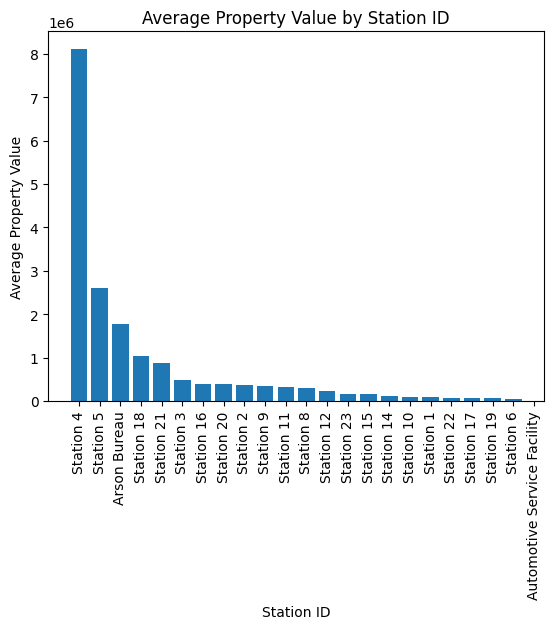

In [13]:
average_values = df.groupby('Station')['Pre_Inci_Value'].mean()

average_values = average_values.sort_values(ascending=False)

plt.bar(average_values.index, average_values.values)
plt.xlabel('Station ID')
plt.ylabel('Average Property Value')
plt.title('Average Property Value by Station ID')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability if necessary
plt.show()

Based on this analysis Station 11 appears to substantially have the most efficiency with saved property. Even with consideration for average property value of response. In future features I would be curious to incorporate other variables such as geographic service areas, avg response times, traffic flow/patterns/known congestion, age of equipment in stations.